In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
import os
from os import listdir
import pickle

# Imports
import numpy as np
import pandas as pd
import cv2 as cv
from time import time
from skimage import io
from PIL import Image
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from glob import glob
# Visualization
import matplotlib.pyplot as plt

#keras
import keras
from keras.preprocessing.image  import img_to_array, ImageDataGenerator, load_img
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
#from keras.applications.xception import Xception, preprocess_input, decode_predictions
from keras.models import Sequential


# Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import callbacks, layers, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from skimage.feature import greycomatrix, greycoprops
from skimage import io

# Notebook magic
%matplotlib inline

In [4]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
data = "E:/projects/PlantVillage"

In [6]:
#EDA
len(os.listdir(data+"/train"))

38

In [7]:
from keras.layers import Dense, Flatten
from keras.models import Model
import keras

In [8]:
base_model = VGG16(input_shape=(256,256,3),weights="imagenet",include_top= False)

In [9]:
for layer in base_model.layers:
  layer.trainable = False

In [10]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

In [11]:
x = Flatten()(base_model.output)

x = Dense(units=38, activation="softmax")(x)


#Creating Model
model = Model(base_model.input, x)

In [12]:
model.compile(optimizer= "adam", loss= keras.losses.categorical_crossentropy, metrics=["accuracy"])

In [13]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)      

In [32]:
train = ImageDataGenerator(brightness_range=(0.5,1.5),zoom_range = 0.3,vertical_flip=True, horizontal_flip = True,fill_mode="constant",preprocessing_function=preprocess_input)

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [33]:
train_mod = train.flow_from_directory(directory= data+"/train",target_size=(256,256),batch_size=40,class_mode = 'categorical')

val = train.flow_from_directory(directory= data+"/val",target_size=(256,256),batch_size=40,class_mode = 'categorical')

Found 43444 images belonging to 38 classes.
Found 10861 images belonging to 38 classes.


In [34]:
t_img, label = train_mod.next()

In [35]:
t_img.shape

(40, 256, 256, 3)

In [36]:
def pltimage(img_arr, label):

  for im , l in zip(img_arr, label):
    plt.figure(figsize=(5,5))
    plt.imshow(im)
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


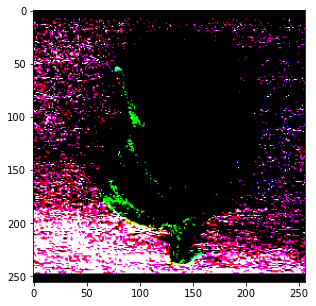

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


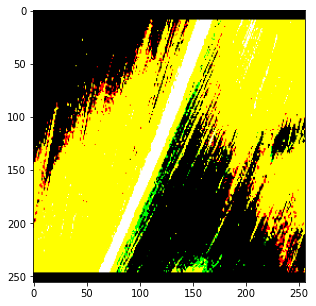

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


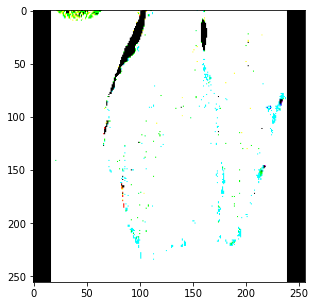

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


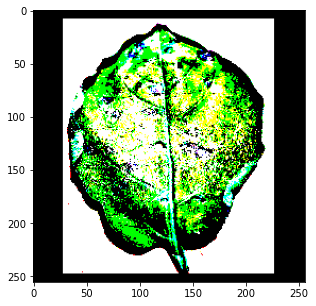

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


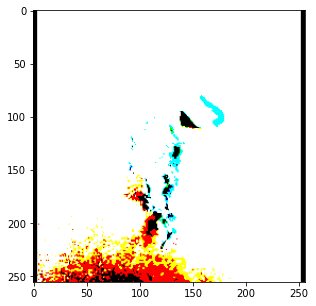

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


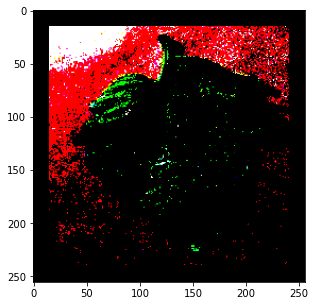

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


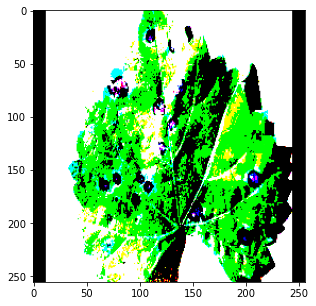

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


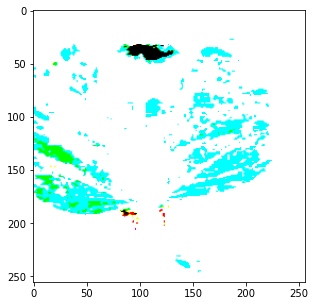

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


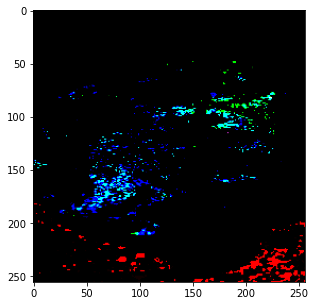

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


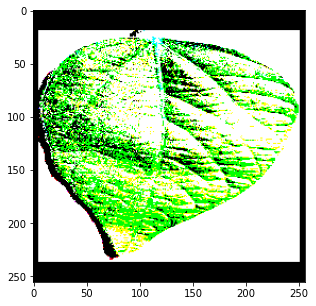

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


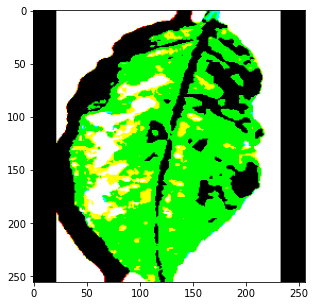

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


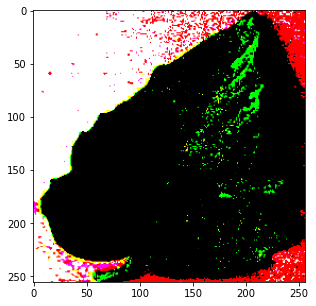

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


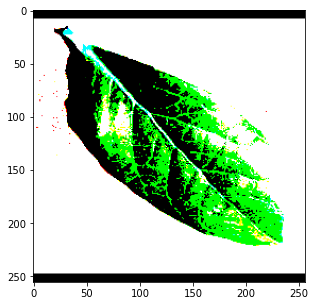

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


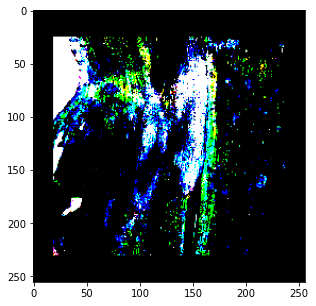

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


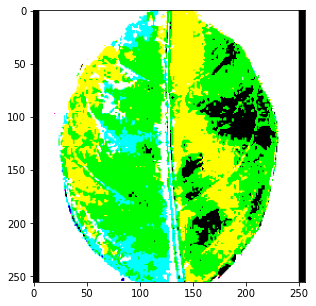

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


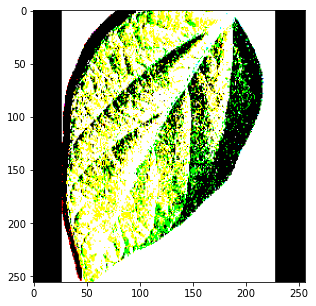

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


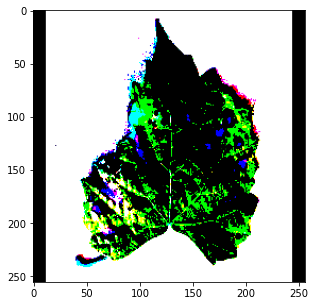

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


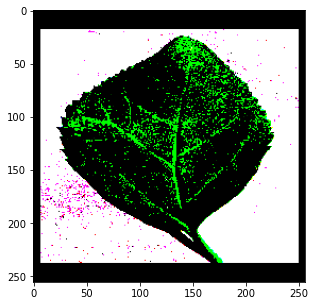

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


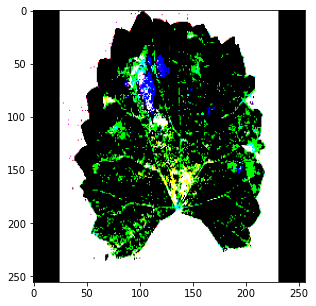

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


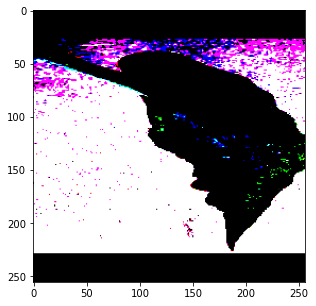

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


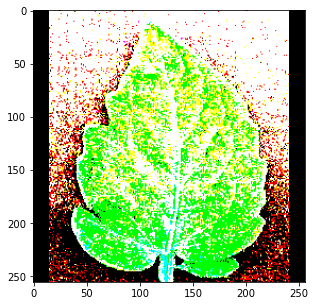

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


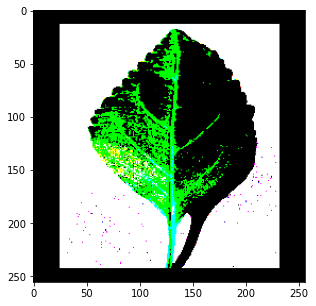

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


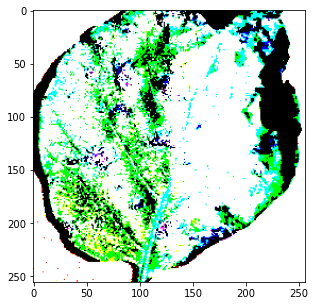

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


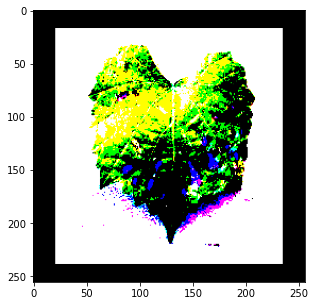

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


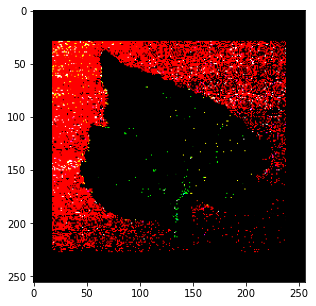

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


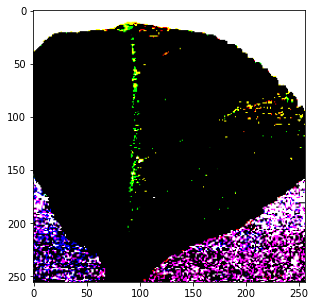

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


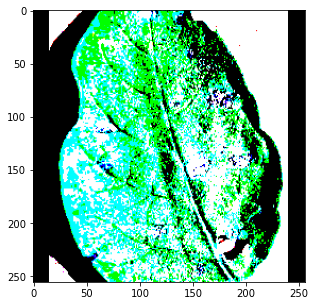

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


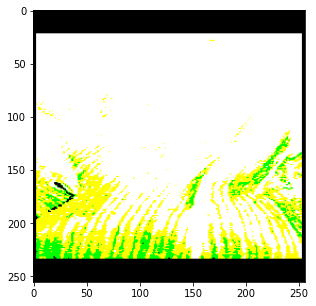

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


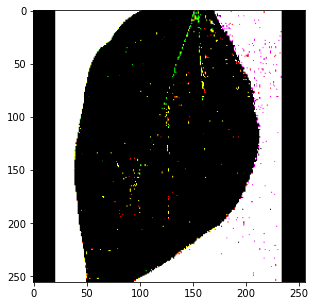

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


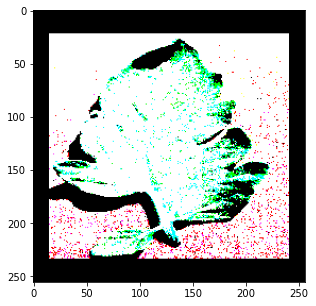

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


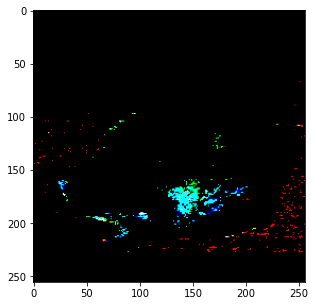

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


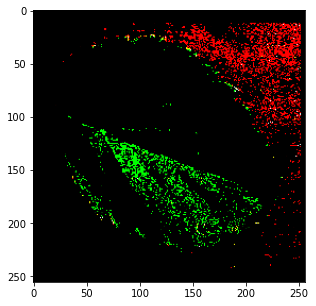

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


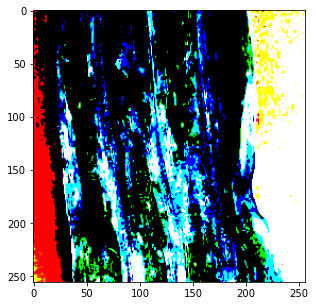

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


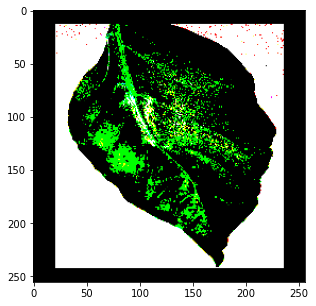

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


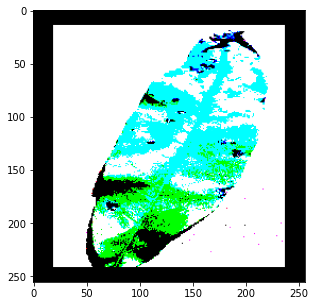

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


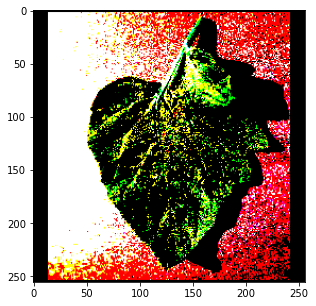

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


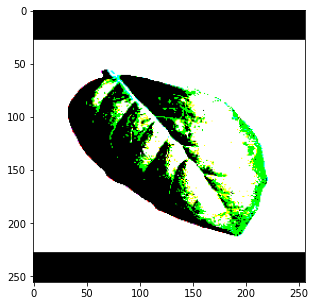

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


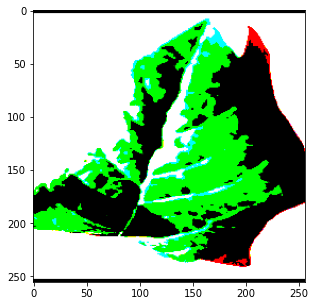

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


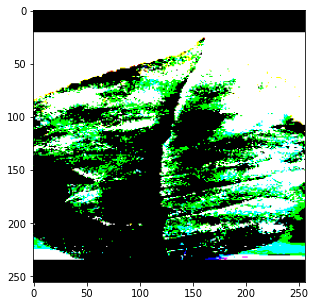

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


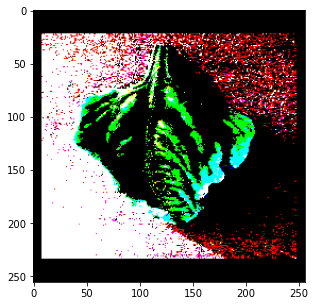

In [37]:
pltimage(t_img, label)

In [39]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

#early stoping
es = EarlyStopping(monitor="val_accuracy", min_delta=0.01,patience=2,verbose=2 )

#model checkpoint
mod_check = ModelCheckpoint(filepath="best_modelp2.h5",monitor="val_accuracy", min_delta=0.01,patience=2,verbose=1,save_best_only=True )


cb = [es, mod_check]

In [40]:
his = model.fit_generator(train_mod, steps_per_epoch=38,epochs= 50,verbose=1, callbacks=cb,validation_data = val, validation_steps=38 )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
38/38 [==============================] - ETA: 0s - loss: 14.1992 - accuracy: 0.4618
Epoch 00001: val_accuracy improved from -inf to 0.61118, saving model to best_modelp2.h5
38/38 [==============================] - 228s 6s/step - loss: 14.1992 - accuracy: 0.4618 - val_loss: 8.5101 - val_accuracy: 0.6112
Epoch 2/50
38/38 [==============================] - ETA: 0s - loss: 6.7765 - accuracy: 0.6895
Epoch 00002: val_accuracy improved from 0.61118 to 0.70197, saving model to best_modelp2.h5
38/38 [==============================] - 231s 6s/step - loss: 6.7765 - accuracy: 0.6895 - val_loss: 5.2825 - val_accuracy: 0.7020
Epoch 3/50
38/38 [==============================] - ETA: 0s - loss: 5.9420 - accuracy: 0.7336
Epoch 00003: val_accuracy improved from 0.70197 to 0.76382, saving model to best_modelp2.h5
38/38 [==============================] - 223s 6s/step - loss: 5.9420 - accuracy: 0.7336 - val_loss: 5.7678 

In [121]:
h = his.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

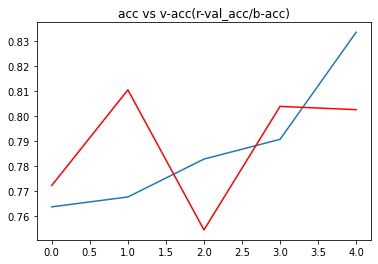

In [122]:
plt.plot(h["accuracy"])
plt.plot(h['val_accuracy'], c = "red")
plt.title("acc vs v-acc(r-val_acc/b-acc)")
plt.show()

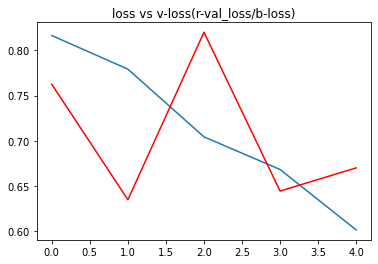

In [123]:
plt.plot(h["loss"])
plt.plot(h['val_loss'], c = "red")
plt.title("loss vs v-loss(r-val_loss/b-loss)")
plt.show()

In [124]:
from keras.models import load_model

model = load_model("E:/projects/best_modelp2.h5")

In [125]:
acc= model.evaluate_generator(val)[1]

print(acc*100)

79.48623299598694


In [126]:
ref =dict((zip(list(train_mod.class_indices.values()),train_mod.class_indices.keys())))

In [127]:
dict((zip(list(train_mod.class_indices.values()),train_mod.class_indices.keys())))

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [128]:
def prediction(path):
  img = load_img(path,target_size=(256,256))
  i = img_to_array(img)
  im = preprocess_input(i)
  img = np.expand_dims(im,axis=0)
  pred = np.argmax(model.predict(img))
  print(img.shape)
  print(pred)
  print(f"{ref[pred]}")

In [130]:
path = "E:/projects/PlantVillage/test/test/AppleCedarRust2.JPG"

prediction(path)

(1, 256, 256, 3)
16
Peach___Bacterial_spot


In [39]:
from tensorflow import lite

In [40]:
tf.keras.models.save_model(model,"best_model.h5")

convert = tf.lite.TFLiteConverter.from_keras_model(model)
convert.optimizations = [tf.lite.Optimize.DEFAULT]
convert.target_spec.supported_types = [tf.float32]
tflite =convert.convert()
open("best_model2.tflite","wb").write(tflite)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: C:\Users\UNDERW~1\AppData\Local\Temp\tmpiu51nyyn\assets


63848944

In [41]:
inter = tf.lite.Interpreter(model_path = "E:/projects/best_model2.tflite")
inter.allocate_tensors()
input_details = inter.get_input_details()
output_details = inter.get_output_details()

input_img = load_img(path)
input_img = img_to_array(input_img)
input_shape = input_details[0]["index"]
print(input_img.shape)
print("\n \n")
print(input_details)
print("\n \n")
print(output_details)

(256, 256, 3)

 

[{'name': 'input_1', 'index': 0, 'shape': array([  1, 256, 256,   3]), 'shape_signature': array([ -1, 256, 256,   3]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]

 

[{'name': 'Identity', 'index': 50, 'shape': array([ 1, 38]), 'shape_signature': array([-1, 38]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [34]:
input_img = img_to_array(input_img)

print(input_img.shape)

(256, 256, 3)


In [35]:
img = input_img.reshape((1,input_img.shape[0],input_img.shape[1],input_img.shape[2]))

print(img.shape)



(1, 256, 256, 3)


In [36]:
inter.set_tensor(input_shape,img)

time_before = time()
inter.invoke()
time_after = time()

total = time_after - time_before

print("time taken is ",total)

time taken is  0.7016403675079346


In [37]:
output_data = inter.get_tensor(output_details[0]["index"])
print(output_data)

[[1.00000000e+00 0.00000000e+00 9.51246361e-35 1.82577020e-36
  0.00000000e+00 1.29731485e-36 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.89906518e-29
  4.93653997e-37 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.73307846e-10 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 8.27680280e-30
  0.00000000e+00 0.00000000e+00]]


In [ ]:
dat